In [27]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [28]:
df_result = pd.read_excel('../data/datos_SIGCSE.xlsx', index_col=0)

Numerical columns are extracted to a new dataframe. Columns 4 to 18 corresponds to option questions of pre-test and columns 25 to 39 are the same questions but asked in post-test. These set of questions are used to perform quantitative analysis.

In [29]:
df_sexo_curso = df_result[[
    "pre_¿Cuál es tu sexo?", 
    "pre_Curso",    
    "pre_Pregunta 17", # Programming experience
    "post_Pregunta 17",
    "post_Pregunta 18",
    "post_Pregunta 19",
    #"pre_Pregunta 1",
    #"post_Pregunta 1"
]]

df_pre = df_result.iloc[:, 4:18] # [:, 4:18] [:, 4:14] [:, 15:18]
df_post = df_result.iloc[:, 25:39] # [:, 25: 39] [:, 25:35] [:,36:39]
pieces = [df_pre, df_post, df_sexo_curso]
df = pd.concat(pieces,axis=1)

Columns "pre sum" (sum of results in pre-test), "post sum" (sum of results in post-test) and "difference" (difference between these sums) are added to dataframe. 

In [30]:
df['pre sum'] = df_pre.sum(axis=1)
df['post sum'] = df_post.sum(axis=1)
df['difference'] = df['post sum'] - df['pre sum']

Only primary and secondary studens remain

In [31]:
df = df[df['pre_Curso'] != "Otro"]

In [32]:
#df = df[df['pre sum'] < 7.875]

Subjects who have left any question blank are removed

In [53]:
df_clean = df.dropna()
df_clean.to_excel("../data/df_clean.xlsx")
df_clean.describe()

,pre_Pregunta 2,pre_Pregunta 3,pre_Pregunta 4,pre_Pregunta 5,pre_Pregunta 6,pre_Pregunta 7,pre_Pregunta 8,pre_Pregunta 9,pre_Pregunta 10,pre_Pregunta 11,...,post_Pregunta 11,post_Pregunta 12,post_Pregunta 13,post_Pregunta 14,post_Pregunta 15,post_Pregunta 17,post_Pregunta 18,pre sum,post sum,difference
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.00000,135.000000
mean,0.725926,0.837037,0.585185,0.548148,0.488889,0.814815,0.777778,0.585185,0.733333,0.666667,...,0.822222,0.633333,0.668519,0.725926,0.638889,4.259259,3.570370,9.225926,10.37037,1.144444
std,0.447708,0.370707,0.494525,0.499530,0.501738,0.389894,0.417288,0.494525,0.443864,0.473160,...,0.383750,0.265912,0.289476,0.302160,0.279369,1.014543,1.018784,2.309510,2.40022,1.973109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.500000,4.25000,-4.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.500000,0.500000,0.500000,0.500000,4.000000,3.000000,7.875000,8.75000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.750000,0.750000,0.750000,0.750000,5.000000,4.000000,9.250000,10.75000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.750000,1.000000,1.000000,0.750000,5.000000,4.000000,11.000000,12.25000,2.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,14.000000,14.00000,8.750000


In [34]:
is_boy = df_clean["pre_¿Cuál es tu sexo?"] == "Chico"
is_girl = df_clean["pre_¿Cuál es tu sexo?"] == "Chica"
is_primary = df_clean['pre_Curso'].str.contains("Primaria")
is_secondary = df_clean['pre_Curso'].str.contains("ESO")
has_experience = (df_clean['pre_Pregunta 17'] == "Sí") | (df_clean['pre_Pregunta 17'] == "No, pero he programado en otro lenguage")
not_has_experience = df_clean['pre_Pregunta 17'] == "No"
age_10_13 = (df_clean['pre_Curso'] == "5º Primaria") | (df_clean['pre_Curso'] == "6º Primaria") |(df_clean['pre_Curso'] == "1º ESO")
age_13_16 = (df_clean['pre_Curso'] == "4º ESO") | (df_clean['pre_Curso'] == "3º ESO") | (df_clean['pre_Curso'] == "4º ESO")


df_boy = df_clean[is_boy]
df_girl = df_clean[is_girl]
df_primary = df_clean[is_primary]
df_secondary = df_clean[is_secondary]
df_has_experience = df_clean[has_experience]
df_not_has_experience = df_clean[not_has_experience]
df_age_10_13 = df_clean[age_10_13]
df_age_13_16 = df_clean[age_13_16]

Sex distribution

In [35]:
df_clean["pre_¿Cuál es tu sexo?"].value_counts()

Chico                  76
Chica                  55
No quiero responder     4
Name: pre_¿Cuál es tu sexo?, dtype: int64

Course distribution

In [36]:
df_clean["pre_Curso"].value_counts()

4º ESO         64
5º Primaria    24
6º Primaria    23
3º ESO         15
2º ESO          6
1º ESO          3
Name: pre_Curso, dtype: int64

Programming experience distribution

In [37]:
df_clean["pre_Pregunta 17"].value_counts()

Sí                                         105
No                                          27
No, pero he programado en otro lenguage      3
Name: pre_Pregunta 17, dtype: int64

In [38]:
df_final = df_clean
#df_final = df_boy
#df_final = df_girl
#df_final = df_primary
#df_final = df_secondary
#df_final = df_has_experience
#df_final = df_not_has_experience
#df_final = df_age_10_13
#df_final = df_age_13_16

In [39]:
df_clean["post_Pregunta 17"].value_counts()

5.0    71
4.0    43
3.0    11
2.0     5
1.0     5
Name: post_Pregunta 17, dtype: int64

In [40]:
df_clean["post_Pregunta 18"].value_counts()

4.0    44
3.0    42
5.0    28
2.0    19
1.0     2
Name: post_Pregunta 18, dtype: int64

In [41]:
df_clean["post_Pregunta 19"].value_counts()

De reconocimiento de textos            79
He hecho proyectos de los dos tipos    30
De reconocimiento de imágenes          26
Name: post_Pregunta 19, dtype: int64

Columns "pre sum", "post sum" and "difference" are statistically described.

In [42]:
df_final[['pre sum', 'post sum', 'difference']].describe()
df_final.to_excel("../data/sujetos_validos_135.xlsx")
df_final.to_csv("../data/sujetos_validos_135.csv")

Histogram for "pre sum"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd260f7fa50>]],
      dtype=object)

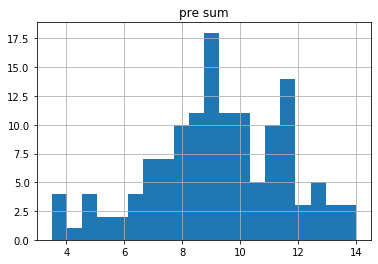

In [43]:
df_final.hist(column="pre sum", bins=20)

Histogram for "post sum"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2617def10>]],
      dtype=object)

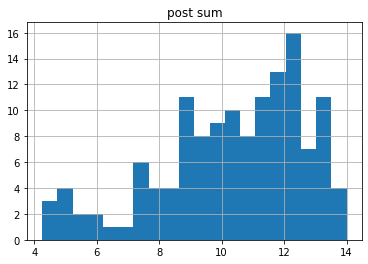

In [44]:
df_final.hist(column="post sum", bins=20)

Histogram for "difference"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd260fb8890>]],
      dtype=object)

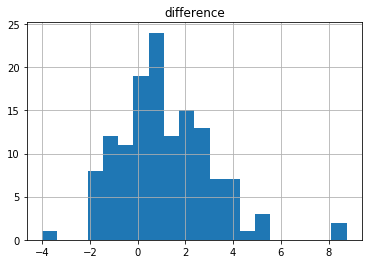

In [45]:
df_final.hist(column="difference", bins=20)

Comparison between "pre sum" and "post sum"

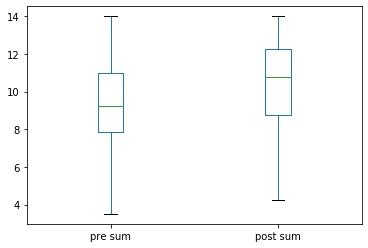

In [46]:
df_final[["pre sum", "post sum"]].plot(kind='box')

Let's see if "pre sum", "post sum" and "difference" columns fit a normal distribution by means of a shapiro-wilk test.

In [47]:
stats.shapiro(df_final["pre sum"])

(0.9824779629707336, 0.08029569685459137)

Column "pre sum" should fit a normal distribution (with alfa = 0.05)

In [48]:
stats.shapiro(df_final["post sum"])

(0.9364288449287415, 8.218829862016719e-06)

Column "post sum" does not fit a normal distribution

In [49]:
stats.shapiro(df_final["post sum"] - df_final["pre sum"])

(0.9586162567138672, 0.00041785973007790744)

Column "difference" does not fit a normal distribution.

Therefore, in order to check if the difference between "post sum" and "pre sum" are statistically significant we must apply some kind of non parametric test. Let's apply wilcoxon test.

In [50]:
stats.wilcoxon(df_final["post sum"], df_final["pre sum"])

WilcoxonResult(statistic=1436.0, pvalue=1.9019885018254204e-09)

Given that p value is very low, we can infer that the difference between pre and post result is highly unlikely to be due to chance, so this improvement could be a consequence of the intervention.

Finally we are going to compute the Cohen's effect size.

In [51]:
stats.ttest_rel(df_final["post sum"], df_final["pre sum"])

Ttest_relResult(statistic=6.739233711165212, pvalue=4.3057704761867147e-10)

Applying a ttest to check if the difference is statistically significant, a similar result is obtained.

In [52]:
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

d = cohend(df_final["post sum"], df_final["pre sum"])
print('Cohens d: %.4f' % d)

Cohens d: 0.4859


This result indicates a moderate effect size, so we can conclude that the intervention, in addition to having a statistical significance, has a practical significance.